In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
#from sklearn.svm import SVC
#from sklearn.model_selection import KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [6]:
 data = pd.read_csv('android.csv')

In [8]:
data

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,41089,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,41375,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,43552,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1


In [10]:
data.shape

(70, 17)

In [12]:
data = data.sample(frac=1).reset_index(drop=True)

In [14]:
data.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,rhythmbox,0.150,2.0,0.203,5.0,1.064,54.40,41.71,0.90,0.60,218635.000,3.01,79690,26.154,14192.0,1984391,0
1,help,0.179,3.0,0.385,18.0,0.610,41.89,34.70,1.01,0.42,182.384,2.47,55528,34.303,12954.0,1563441,0
2,browser,0.571,2.0,0.099,15.0,1.368,58.01,47.29,0.75,0.77,214333.000,3.67,73294,30.224,17894.0,1716287,0
3,system-monitor,0.182,11.0,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.000,2.14,87246,23.621,19071.0,2140178,0
4,ping,0.000,5.0,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.000,26.43,85861,111.667,19973.0,2060667,0


In [16]:
import seaborn as sns

<Axes: xlabel='malware', ylabel='count'>

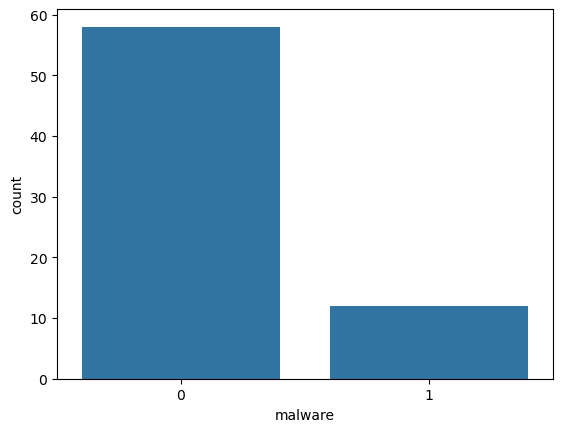

In [22]:
sns.countplot(x = 'malware', data = data)

In [27]:
target_count = data.malware.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])


Class 0: 58
Class 1: 12


In [29]:
count_class_0, count_class_1 = data.malware.value_counts()

In [31]:
df_class_0 = data[data['malware'] == 0]
df_class_1 = data[data['malware'] == 1]

In [34]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_test_over = pd.concat([df_class_0 , df_class_1_over], axis =0)

In [36]:
df_test_over.shape

(116, 17)

<Axes: xlabel='malware', ylabel='count'>

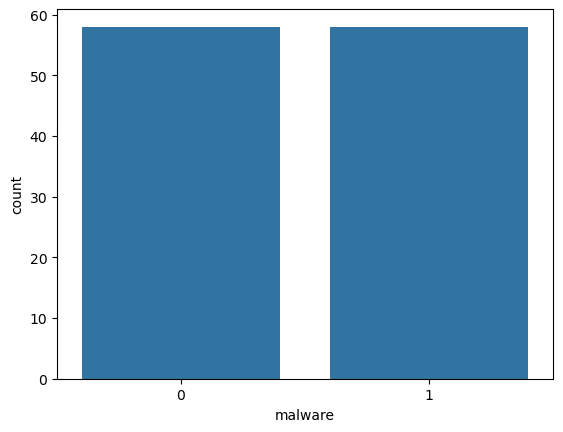

In [38]:
sns.countplot(x = 'malware', data = df_test_over)

In [40]:
x = df_test_over.iloc[:,df_test_over.columns != 'malware']
y = df_test_over.iloc[:,df_test_over.columns == 'malware']

In [42]:
x.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
0,rhythmbox,0.150,2.0,0.203,5.0,1.064,54.40,41.71,0.90,0.60,218635.000,3.01,79690,26.154,14192.0,1984391
1,help,0.179,3.0,0.385,18.0,0.610,41.89,34.70,1.01,0.42,182.384,2.47,55528,34.303,12954.0,1563441
2,browser,0.571,2.0,0.099,15.0,1.368,58.01,47.29,0.75,0.77,214333.000,3.67,73294,30.224,17894.0,1716287
3,system-monitor,0.182,11.0,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.000,2.14,87246,23.621,19071.0,2140178
4,ping,0.000,5.0,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.000,26.43,85861,111.667,19973.0,2060667


In [44]:
y.head()

,malware
0,0
1,0
2,0
3,0
4,0


In [46]:
from sklearn.utils import shuffle

In [48]:
x, y = shuffle(x,y)

In [50]:
x.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
55,13915,0.577,0.00,0.000,48.00,0.343,384.13,314.11,3.17,1.21,108002.0,12.93,93825,89.487,14077.0,2251821
31,gnome-software,0.883,1.00,0.124,15.00,0.003,1852.55,2496.88,85.32,0.29,35031.0,0.57,24367,8.980,3601.0,877674
22,stickynotes,0.043,2.00,0.100,12.00,1.335,57.79,42.12,1.05,0.55,317460.0,3.86,88320,36.630,14588.0,2151632
37,40079,1.099,0.13,0.052,0.11,0.447,71.78,79.23,0.16,4.86,24759.0,2.11,45507,92.371,8874.0,1093187
45,terminal,0.696,1.00,0.051,27.00,1.206,47.85,37.77,0.98,0.49,252568.0,6.78,67340,45.405,15504.0,1790055


In [52]:
x = x.drop(columns='name')

In [54]:
x.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
55,0.577,0.00,0.000,48.00,0.343,384.13,314.11,3.17,1.21,108002.0,12.93,93825,89.487,14077.0,2251821
31,0.883,1.00,0.124,15.00,0.003,1852.55,2496.88,85.32,0.29,35031.0,0.57,24367,8.980,3601.0,877674
22,0.043,2.00,0.100,12.00,1.335,57.79,42.12,1.05,0.55,317460.0,3.86,88320,36.630,14588.0,2151632
37,1.099,0.13,0.052,0.11,0.447,71.78,79.23,0.16,4.86,24759.0,2.11,45507,92.371,8874.0,1093187
45,0.696,1.00,0.051,27.00,1.206,47.85,37.77,0.98,0.49,252568.0,6.78,67340,45.405,15504.0,1790055


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state = 0)

In [64]:
x_train.shape

(81, 15)

In [66]:
x_train.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
50,0.579,19.0,0.000,26.0,0.297,359.57,359.34,4.99,0.72,153480.0,7.36,87639,95.313,12128.0,2103360
54,0.412,37.0,0.000,31.0,0.757,127.44,99.30,1.52,0.84,126140.0,6.77,75666,101.751,9177.0,1815993
68,0.001,4.0,0.698,20.0,0.538,164.53,149.01,2.98,0.55,184041.0,7.78,94545,107.235,14219.0,2269099
59,0.001,9.0,0.000,9.0,1.047,148.52,128.07,0.95,1.56,86291.0,13.61,89078,112.547,19866.0,2137934
40,0.058,3.0,0.162,5.0,0.819,52.64,39.63,0.50,1.05,116867.0,2.29,57358,29.305,8023.0,1416731


In [68]:
y_train.head()

,malware
50,0
54,0
68,0
59,1
40,0


In [70]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Decision tree classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
tree = DecisionTreeClassifier()

In [77]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
Prediction = tree.predict(x_test)
Prediction

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [83]:
Model = metrics.accuracy_score(y_test,Prediction)
print("The Accuracy is : ",Model)

The Accuracy is :  0.9714285714285714


In [85]:
cnf_matrix = confusion_matrix(y_test,Prediction)

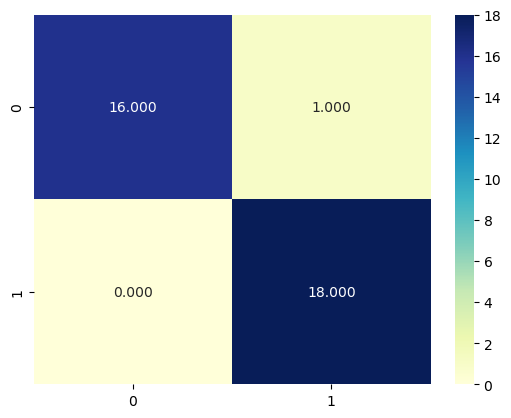

In [93]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()